# Text mining and Image Recognition: Hoja de Trabajo 1
#### Ruben Gonzalez 20003314

In [2]:
import cv2
import numpy as np
import sys

import matplotlib.pyplot as plt

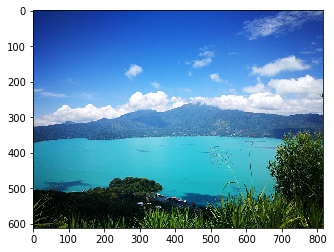

In [251]:
#Imagen de pruebas a usar
img = cv2.imread('CoatepequeShort.jpg', cv2.IMREAD_COLOR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

#### Problema 1:
Desarrolle una funcion la cual reciba dos parametros, una imagen y un entero llamado color, la
funcion debe devolver una imagen la cual tenga activos los canales de color segun los siguientes
puntos:
* Si el parametro color vale 1, la imagen debe mostrar activos unicamente el color azul.
* Si el parametro color vale 2, la imagen debe mostrar activos unicamente el color verde.
* Si el parametro color vale 3, la imagen debe mostrar activos unicamente el color rojo.
* Si el parametro color vale 10, la imagen debe mostrar activos unicamente los colores rojo y verde.
* Si el parametro color vale 20, la imagen debe mostrar activos unicamente los colores verde y azul.
* Si el parametro color vale 30, la imagen debe mostrar activos unicamente los colores azul y rojo.

In [176]:
def PlotImagen(nombre):
    img = cv2.imread(nombre, cv2.IMREAD_COLOR)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)

In [92]:
def VectorColores(color):
    vector=[]
    if color == 1:
        vector=[0,0,1]
    elif color ==2:
        vector=[0,1,0]
    elif color ==3:
        vector=[1,0,0]
    elif color ==10:
        vector=[1,1,0]
    elif color == 20:
        vector=[0,1,1]
    elif color ==30:
        vector=[1,0,1]
    return vector

In [171]:
def CanalesActivos(imagen, color, nombre):
    ancho = imagen.shape[0]
    alto = imagen.shape[1]

    graySalida = np.zeros((ancho, alto, 3))
    vColor = VectorColores(color)
            
    for i in range(0,ancho):
        for j in range(0, alto):
            pixel = imagen[i,j]
            colorNuevo=[]
            
            for k in range(0,pixel.shape[0]):
                    colorNuevo.append(vColor[k]*pixel[k])
            #print(np.array(colorNuevo))
            pixelFinal=np.array(colorNuevo, dtype= int)
            graySalida[i,j]=pixelFinal
    cv2.imwrite(nombre, graySalida)
    return graySalida

In [178]:
x1 =CanalesActivos(img,2,'Problema1.jpg')

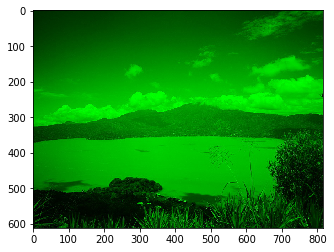

In [179]:
PlotImagen('Problema1.jpg')

#### Problema 2
En el .zip del laboratorio se le compartio un conjunto de imagenes en escala de grises, estas imagenes
fueron creadas utilizando una escala de grises en 3D, cree una funcion que dadas las 3 imagenes se
construya la imagen original a color.

In [131]:
#Imagenes del problema
imgAzul = cv2.imread('imagen1_salida_gray_azul.jpg', cv2.IMREAD_COLOR)
imgAzul = cv2.cvtColor(imgAzul, cv2.COLOR_BGR2RGB)

imgRojo = cv2.imread('imagen1_salida_gray_rojo.jpg', cv2.IMREAD_COLOR)
imgRojo = cv2.cvtColor(imgRojo, cv2.COLOR_BGR2RGB)

imgVerde = cv2.imread('imagen1_salida_gray_verde.jpg', cv2.IMREAD_COLOR)
imgVerde = cv2.cvtColor(imgVerde, cv2.COLOR_BGR2RGB)

In [185]:
def ObtenerOriginal(Azul, Rojo, Verde, nombre):
    ancho = Azul.shape[0]
    alto = Azul.shape[1]
    
    Salida = np.zeros((ancho, alto, 3))
    
    for i in range(0,ancho):
        for j in range(0, alto):
            pixelColor=[int(Azul[i,j][0]), int(Verde[i,j][0]), int(Rojo[i,j][0])]
            Salida[i,j]=pixelColor
    cv2.imwrite(nombre, Salida)
    return Salida
    

In [186]:
Prob2=ObtenerOriginal(imgAzul,imgRojo,imgVerde,'Problema2.jpg')

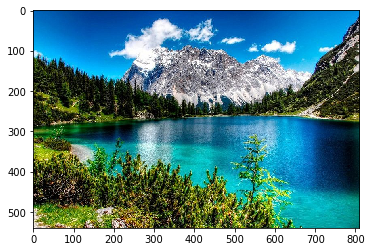

In [187]:
PlotImagen('Problema2.jpg')

#### Problema 3
Cree una funcion que dada una imagen cree una escala de grises en tres dimensiones, tome en
cuenta que su funcion debe crear 3 imagenes como salida. Para entregar este ejercicio debe incluir
una las imagenes que haya utilizado como prueba y el resultado de las misma, no puede utilizar la
imagen del Problema #2.

In [188]:
def CrearEscalas(imgOriginal, nombre):
    ancho = imgOriginal.shape[0]
    alto = imgOriginal.shape[1]
    
    Salida_Azul = np.zeros((ancho, alto, 3))
    Salida_Verde = np.zeros((ancho, alto, 3))
    Salida_Rojo = np.zeros((ancho, alto, 3))
    
    for i in range(0,ancho):
        for j in range(0, alto):
            pixelColor= imgOriginal[i,j]
            pixelAzul=[pixelColor[0], pixelColor[0], pixelColor[0]]
            pixelVerde=[pixelColor[1], pixelColor[1], pixelColor[1]]
            pixelRojo=[pixelColor[2], pixelColor[2], pixelColor[2]]
            Salida_Azul[i,j]=pixelAzul
            Salida_Verde[i,j]=pixelVerde
            Salida_Rojo[i,j]=pixelRojo
    cv2.imwrite(nombre+'_Azul.jpg', Salida_Azul)
    cv2.imwrite(nombre+'_Verde.jpg', Salida_Verde)
    cv2.imwrite(nombre+'_Rojo.jpg', Salida_Rojo)
    return Salida_Azul, Salida_Verde, Salida_Rojo

In [239]:
_,_,_=CrearEscalas(img,'Coatepeque')

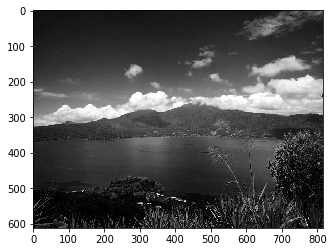

In [240]:
PlotImagen('Coatepeque_Azul.jpg')

#### Problema 4:
Cree una funcion que dada una imagen, muestre el histograma de cada canal de color y el de
escala de grises (utilice un promedio aritmetico para su escala de grises, no puede usar funciones
de opencv), sus histogramas deben incluir una linea vertical la cual muestre el valor de la media
de la distribucion.

In [237]:
def EscalaGrisesAritmetico(img, nombre):
    alto = img.shape[0]
    ancho = img.shape[1]
    
    Salida = np.zeros(( alto,ancho, 3))
    
    for i in range(0,alto):
        for j in range(0, ancho):
            pixel = img[i,j]
            prom=int(np.mean(pixel))
            Salida[i,j]=[prom, prom, prom]
            
    cv2.imwrite(nombre+'_Aritmetico.jpg', Salida)
    return Salida
    

In [262]:
def CrearHistogramas(img, nombre):
    Aritmetico=EscalaGrisesAritmetico(img,nombre)
    CoatAzul,CoatVerde,CoatRojo=CrearEscalas(img,nombre)
    histAritmetico,_ = np.histogram(Aritmetico.ravel(),256,[0,256])
    histAzul,_ = np.histogram(CoatAzul.ravel(),256,[0,256])
    histVerde,_ = np.histogram(CoatVerde.ravel(),256,[0,256])
    histRojo,_ = np.histogram(CoatRojo.ravel(),256,[0,256])
    
    plt.plot(histAritmetico, color='gray')
    plt.plot(histAzul, color='blue')
    plt.plot(histVerde, color='green')
    plt.plot(histRojo, color='red')
    return histAritmetico, bins

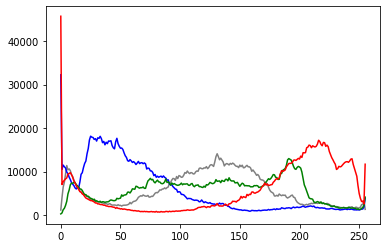

In [263]:
arit=CrearHistogramas(img, 'Coatepeque')

#### Problema 5:
Investigue en que consiste el enfoque de escala de grises ponderado, luego de esto implemente una
funcion que dada una imagen, realice una escala de grises ponderada (notar que no existe una
solucion unica).

In [256]:
def EscalaGrisesPonderado(img, nombre):
    alto = img.shape[0]
    ancho = img.shape[1]
    
    Salida = np.zeros(( alto,ancho, 1))
    
    for i in range(0,alto):
        for j in range(0, ancho):
            pixel = img[i,j]
            Salida[i,j]=[int((pixel[0]*0.11))+int((pixel[1]*0.59))+int((pixel[2]*0.3))]
            
    cv2.imwrite(nombre+'_Ponderado.jpg', Salida)
    return Salida

In [257]:
Ponderado = EscalaGrisesPonderado(img,'Coatepeque')

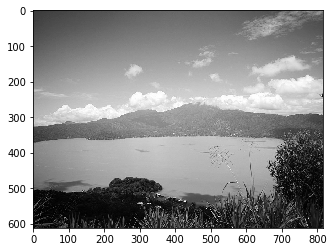

In [258]:
PlotImagen('Coatepeque_Ponderado.jpg')

#### Problema 6:
Investigue brevemente en que consiste el espacio de color HSV y como se mapean colores a dicho
espacio, para entregar este ejercicio puede hacer con un archivo PDF.

El espacio HSV es un modelo creado en 1978 por Alvy Ray Smith, consiste en una transformacion no lineal del espacio RGB.

Su representacion es la de un cono de colores donde en la parte circular se encuentra el espectro completo de colores RGB y a medida que se asciende hacia arriba del cono el color tiende a hacerse cero, de igual forma a medida que se acerca hacia el centro del cono el valor tiende a hacerse 255. A continuacion una imagen para comprender mejor este concepto:

<img src = "https://upload.wikimedia.org/wikipedia/commons/f/f1/HSV_cone.jpg">

De esta forma se representa de manera sencilla la seleccion del color y su saturacion tomando la pieza seleccionada del color y luego elegir la saturacion a utilizar.

